# Γραμμική παλινδρόμηση & Δέντρα αποφάσεων

Θα συγκρίνουμε τις 2 μεθόδους μηχανικής μάθησης.

## Επανάληψη: Γραμμική παλινδρόμηση 

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


###  Πάμε να χρησιμοποιήσουμε ξανά τα Bostοn housing data, αλλά αυτή τη φορά με δέντρα αποφάσεων. 

In [1]:
from sklearn import datasets

boston_set = datasets.load_boston()  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
print(boston_set.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
print(boston_set.keys())
print(boston_set.data.shape) 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


In [6]:
# Βάζουμε τα data σε DataFrame
boston_df = pd.DataFrame(boston_set.data, columns=boston_set.feature_names)
# προσθέτουμε το target στο DataFrame
boston_df['PRICE'] = pd.Series(boston_set.target)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
# Μετατρέπουμε τα δεδομένα του df σε ndarray
# Μετατρέπουμε την στήλη που μας ενδιαφέρει π.χ. το RM 
X = boston_df.drop(columns = 'PRICE')
# target
Y = boston_df.PRICE


In [16]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


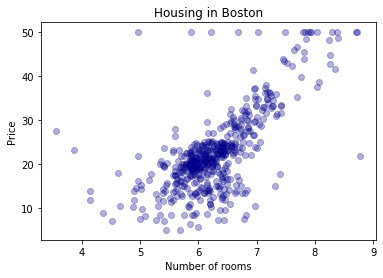

In [22]:
# Οπτικοποίηση με scatter plot
s1 = plt.scatter(X['RM'], Y, color='darkblue', marker='o', alpha = 0.3)
# labels
plt.xlabel('Number of rooms')  # Set xlabel
plt.ylabel('Price') # Set ylabel
# title
plt.title('Housing in Boston') # Set title
# final plot
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# 1. Split data σε training και test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Επανάληψη: Κάνουμε fit το linear regression model

In [67]:


from sklearn.linear_model import LinearRegression


In [68]:
lin_reg = LinearRegression()
# εκπαίδευση 
lin_reg.fit(X_train, y_train)
# Φτιάχνει τις προβλέψεις με το test  data-set
y_pred = lin_reg.predict(X_test)
# υπολογισμός MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# υπολογισμός R squared
r2 = round(r2_score(y_test, y_pred),2)  
# Coefficients 
b = lin_reg.coef_
# Intercept
d = lin_reg.intercept_
# Γράφουμε σε κείμενο τα λάθη
txt = "R2 = {} \nRMSE = {} \ncoef = {} \nintercept = {}"
# και τα τυπώνουμε
print(txt.format(r2, rmse, b, d))

R2 = 0.59 
RMSE = 5.783509315085122 
coef = [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01] 
intercept = 38.091694926301855


### Αποτελέσματα του μοντέλου, πόσο καλά τα πήγε?

Πώς περιμένετε ότι θα είναι η γραμμή? και πόσο καλά εξηγεί τα δεδομένα?

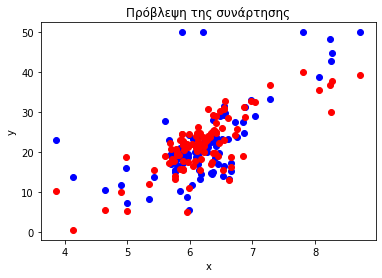

In [71]:
s1 = plt.scatter(X_test['RM'], y_test, color='b', marker='o')

plt.xlabel('x')

plt.ylabel('y')

plt.title('Πρόβλεψη της συνάρτησης')
# προσθέτουμε τη γραμμή

plt.scatter(X_test['RM'], y_pred, color='red')

plt.show()

Όπως βλέπουμε η γραμμική παλινδρόμηση δεν μπορεί να πιάσει την συγκεκριμένη δομή δεδομένων. 


Πάμε λοιπόν να δοκιμάσουμε μη γραμμικά μοντέλα:

## Δέντρα αποφάσεων


In [23]:
# Εισάγουμε τον regressor από το scikit-learn
from sklearn.tree import DecisionTreeRegressor

In [56]:
# Decision Tree με max depth 2
#regr_tree = DecisionTreeRegressor(max_depth=8)
regr_tree = DecisionTreeRegressor(min_samples_leaf = 8) 

In [57]:
# Fit το decision tree model
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=8)

In [58]:
# predictions
y_pred = regr_tree.predict(X_test)
# Print predictions
print(y_pred)

[23.07692308 20.06363636 21.475      12.53333333 21.60714286 20.9
 21.60714286 20.9        19.64       20.55        7.1875     13.41818182
 16.22222222  7.1875     45.35       33.1625     21.60714286 33.1625
 25.3        20.9        23.07692308 19.64       20.06363636 23.07692308
 22.54166667 20.06363636 18.43333333 15.5625     39.5875     19.45
 16.22222222 17.65       20.9        24.95555556 23.64444444 17.65
  7.1875     20.06363636 13.15       13.41818182 24.95555556 22.54166667
 24.95555556 16.22222222 23.64444444 23.64444444 20.7875     15.5625
 16.54545455 26.52       15.5625     19.45       19.64       39.5875
 15.5625     19.1375     19.64       18.43333333 20.06363636 20.7875
 21.07777778 24.95555556 35.55833333 27.05833333 17.65       27.05833333
 15.5625     19.1375     13.15       22.54166667 21.60714286 21.60714286
 23.58888889 30.89166667 26.575       9.13       39.5875     21.475
 23.64444444 21.60714286 27.05833333 17.65       20.06363636 39.5875
 39.5875     25.3     

In [59]:
# λάθος MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# λάθος R squared
r2 = round(r2_score(y_test, y_pred),2)  

txt_one_feature = "R2 = {} \nRMSE = {}"


print(txt_one_feature.format(r2, rmse))

R2 = 0.62 
RMSE = 5.545478622640856


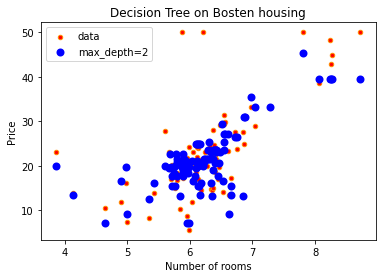

In [60]:
# Οπτικοποίηση αποτελεσμάτων 
plt.figure()
plt.scatter(X_test['RM'], y_test, s=20, edgecolor="darkorange",
            c="r", label="data")
plt.scatter(X_test['RM'], y_pred, color="b", label="max_depth=2", linewidth=2)
plt.xlabel("Number of rooms")
plt.ylabel("Price")
plt.title("Decision Tree on Bosten housing")
plt.legend()
#final plot
plt.show()

Είδαμε ότι το βάθος των δέντρων επηρεάζει δραστικά την απόδοση. Βέβαια όταν υπάρχουν ακραία στοιχεία δεν είναι καλό το δέντρο να εκπαιδεύεται πολύ καλά σε αυτά, καθώς μετά κάνει overfit. Επίσης, είδαμε ότι αν περιορίσουμε το δέντρο μας πολύ τότε πάλι δεν έχουμε καλές προβλέψεις. Η διαδικασία με την οποία προσπαθούμε να φτιάξουμε το τέλειο μοντέλο λέγεται hyperparameter optimization. Αυτό θα το δούμε στα επόμενα μαθήματα. 

In [62]:
from sklearn.tree import plot_tree


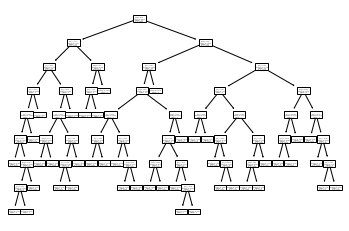

In [63]:
#tree plot
plot_tree(regr_tree)

plt.show()

Δοκιμάστε διαφορετικό βάθος δέντρων για να βρείτε διαφορές. 
Γενικά παρατηρούμε ότι με το decision tree παίρνουμε κοντινά αποτελέσματα όπως και στο γραμμικό μοντέλο αλλά εξηγεί μεγαλύτερο variance σε σχέση με το γραμμικό μοντέλο, (εκπαίδευση στα ίδια δεδομένα με την ίδια στήλη πήραμε R² = 0.58)

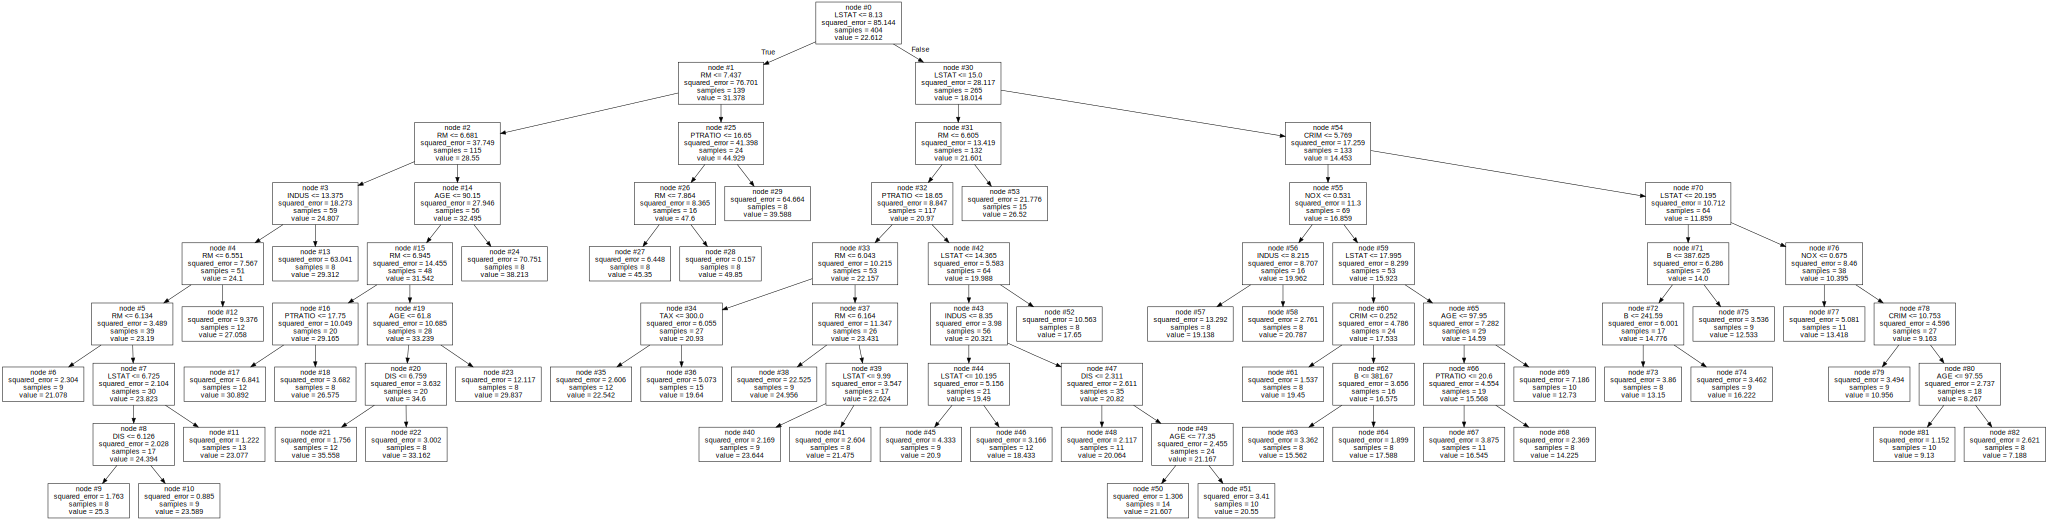

In [65]:
# visualizing our decision tree 
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(regr_tree)
graphviz.Source(export_graphviz(regr_tree,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=["0", "1"],
                                node_ids = True,
                                impurity=True))

## Συζήτηση

Όταν βάλαμε τα υπόλοιπα features βελτιώνονται οι προβλέψεις (χρησιμοποιώντας το ίδιο βάθος). Επίσης, όσο μεγαλώνουμε το βάθος τα δεδομένα κάνουν καλύτερο fit και πλησιάζουμε πιο κοντά στο ιδανικό R² = 1.
Παρόλα αυτά αυτό που συμβαίνει μέχρι τώρα είναι ότι κάνουμε overfit τα data. Υποθέτοντας ότι εκπαιδεύσαμε το μοντέλο με ΟΛΑ τα δεδομένα, όταν ένα νέο σπίτι βγει στην πώληση, το μοντέλο μας δεν θα καταφέρει να προβλέψει σωστά εφόσον δεν έχει ξαναδεί το συγκεκριμένο σπίτι.

Υπάρχουν φυσικά τρόποι να  κάνουμε το μοντέλο μας  γενικεύσιμο και αυτό θα το μάθουμε στο μάθημα. 